In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the Data
df = pd.read_csv('data.csv')

In [4]:
# Exploring the data
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [12]:
# We can drop some unneccessary columns 
df.drop(['Unnamed: 0','Movie Info'],axis=1,inplace=True)
df.head()

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Release_Year
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2015
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,2019
2,Avatar (2009),Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2009
3,Black Panther (2018),Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,2018
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2018


In [5]:
# Quick statistical Analysis of the Dataset
df.describe()

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,918.000000,9.180000e+02,9.180000e+02,9.180000e+02
mean,458.500000,1.677469e+08,2.301434e+08,3.968668e+08
std,265.148072,1.040360e+08,2.176011e+08,3.082629e+08
min,0.000000,8.036084e+07,2.600000e+02,8.160000e+07
25%,229.250000,1.016071e+08,8.845620e+07,2.005564e+08
50%,458.500000,1.321351e+08,1.638819e+08,3.019416e+08
75%,687.750000,1.913905e+08,2.885577e+08,4.750718e+08
max,917.000000,9.366622e+08,2.086739e+09,2.847246e+09


In [6]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


In [7]:
# Identifying missing values in columns
df.isnull().sum()

Unnamed: 0                      0
Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64

In [19]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

df['Release year']=df['Title'].apply(lambda x: x.split()[-1].replace('(','').replace(')',''))

df['Release year']

0      2015
1      2019
2      2009
3      2018
4      2018
       ... 
913    2004
914    2001
915    2010
916    2003
917    2011
Name: Release year, Length: 918, dtype: object

In [20]:
df=df.drop('Release Date',axis=1)

In [21]:
df['Movie Runtime(in min)']=df['Movie Runtime'].apply(lambda x : int(x.split()[0])*60+int(x.split()[2]) if 'min' in x else int(x.split()[0])*60)

In [23]:
df=df.drop('Movie Runtime',axis=1)

In [24]:
df['Title']=df['Title'].apply(lambda x: x.split('(')[0])

In [26]:
df=df.fillna('none')

In [28]:
df[df.License=='none']

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Release_Year,Release year,Movie Runtime(in min)
3,Black Panther,Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",none,2018,2018,134
4,Avengers: Infinity War,Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",none,2018,2018,149
5,Spider-Man: No Way Home,Sony Pictures Entertainment (SPE),675813257,868642706,1544455963,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",none,2021,2021,148
10,Incredibles 2,Walt Disney Studios Motion Pictures,608581744,634507500,1243089244,"['Action', 'Adventure', 'Animation', 'Comedy',...",none,22018,2018,118
16,Finding Dory,Walt Disney Studios Motion Pictures,486295561,542275381,1028570942,"['Adventure', 'Animation', 'Comedy', 'Family']",none,2016,2016,97
...,...,...,...,...,...,...,...,...,...,...
891,Mr. Holland's Opus,Walt Disney Studios Motion Pictures,82569971,23700000,106269971,"['Drama', 'Music']",none,1995,1995,143
896,Bridge to Terabithia,Walt Disney Studios Motion Pictures,82272442,55314621,137587063,"['Drama', 'Family', 'Fantasy']",none,2007,2007,96
903,MASH,Twentieth Century Fox,81600000,81600000,81600000,"['Comedy', 'Drama', 'War']",none,1970,1970,116
912,Congo,Paramount Pictures,81022101,71000000,152022101,"['Action', 'Adventure', 'Mystery', 'Sci-Fi']",none,1995,1995,109


In [30]:
l=[]
for i,j in zip(df['License'],df['Genre']):
    if i == 'none':
        if 'Family' in j:
            l.append(i.replace('none','PG'))
        else:
            l.append(i.replace('none','PG-13'))
    else:
        l.append(i)

In [31]:
df['License']=l

In [32]:
df['License'].value_counts()

PG-13    473
PG       237
R        194
G         14
Name: License, dtype: int64

In [34]:
df.Distributor.value_counts()

Warner Bros.                           158
Walt Disney Studios Motion Pictures    155
Universal Pictures                     119
Twentieth Century Fox                  117
Sony Pictures Entertainment (SPE)      101
Paramount Pictures                      99
New Line Cinema                         21
DreamWorks                              21
Lionsgate                               19
DreamWorks Distribution                 17
Metro-Goldwyn-Mayer (MGM)               12
TriStar Pictures                         9
Miramax                                  9
Revolution Studios                       8
Dimension Films                          7
Columbia Pictures                        7
The Weinstein Company                    6
Summit Entertainment                     5
Fox Searchlight Pictures                 4
STX Entertainment                        3
Orion Pictures                           3
Screen Gems                              3
FilmDistrict                             2
United Arti

In [35]:
df.Distributor=df.Distributor.apply(lambda x : x.replace('DreamWorks Distribution','DreamWorks'))

# EDA

<AxesSubplot:>

<Figure size 720x576 with 0 Axes>

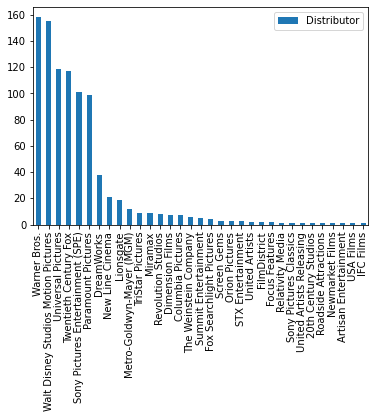

In [36]:
plt.figure(figsize=(10,8))
df['Distributor'].value_counts().to_frame().plot(kind='bar')

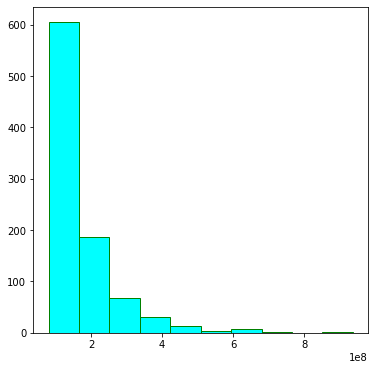

In [37]:
plt.figure(figsize=(6,6))
plt.hist(df['Domestic Sales (in $)'],color='cyan',edgecolor='green');

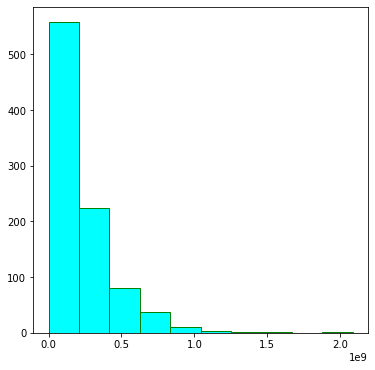

In [39]:
plt.figure(figsize=(6,6))
plt.hist(df['International Sales (in $)'],color='cyan',edgecolor='green');

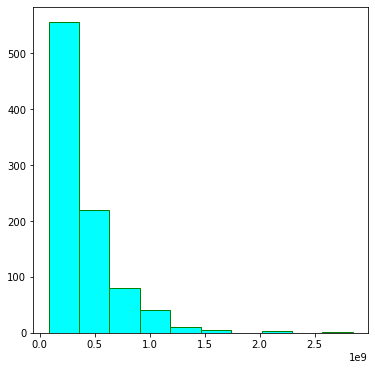

In [40]:
plt.figure(figsize=(6,6))
plt.hist(df['World Sales (in $)'],color='cyan',edgecolor='green');

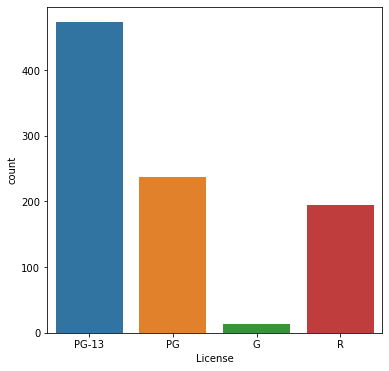

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(df['License']);

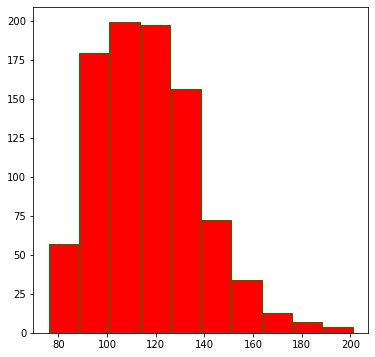

In [42]:
plt.figure(figsize=(6,6))
plt.hist(df['Movie Runtime(in min)'],color='r',edgecolor='green');

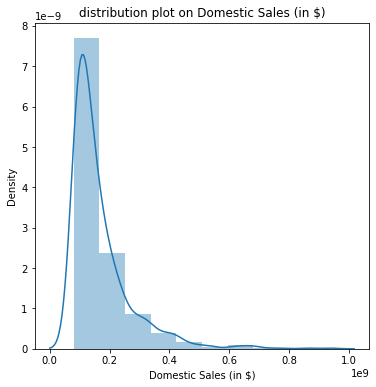

In [43]:
plt.figure(figsize=(6,6))
sns.distplot(df['Domestic Sales (in $)'],bins=10)
plt.title('distribution plot on Domestic Sales (in $)')
plt.show()

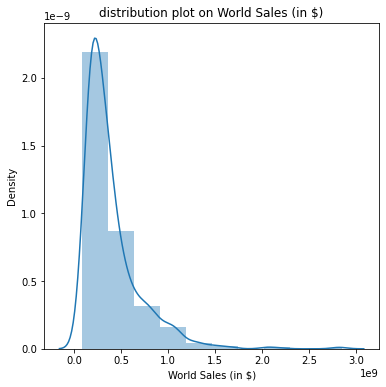

In [44]:
plt.figure(figsize=(6,6))
sns.distplot(df['World Sales (in $)'],bins=10)
plt.title('distribution plot on World Sales (in $)')
plt.show()